In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Simulation des sinistres
def sim_nb_sinitres(n_clients,p_sinistre,n_annees):
    return np.random.binomial(n_clients, p_sinistre, n_annees)

In [14]:
 # Simulation des couts des sinistres
def sim_cts_sinitres(alpha,sum_n_sinistres,beta):
    return np.random.weibull(alpha, sum(n_sinistres)) * beta

In [15]:
 # Simulation du capital restant
def sim_capital(n_annees, capital_initial, prime_anuelle, couts_total):
    capital = np.zeros((n_annees+1, 1))
    capital[0] = capital_initial
    for i in range(n_annees):
        capital[i+1] = capital[i] + prime_annuelle - couts_total[i]
    return capital

In [16]:
# Calcul de la probabilité de ruine
def calcul_probruine(capital):
    a = np.where(capital[:, 0] < 0)[0]
    if len(a) == 0:
        A[j] = 0
    else:
        A[j] = 1
    return (np.mean(A))

In [35]:
# Paramètres de la simulation
n_clients = 1000
p_sinistre = 0.1
n_annees = 20
capital_initial = 1000000
prime_annuelle = 1000000
# Paramètres de la loi de weibull
alpha = 2
beta = 10000
# Nombre de simulations
M = 1000  

In [36]:
A = np.zeros(M)
n_sinistres_all = np.zeros((n_annees, M)) # Stocker le nombre de réclamations pour chaque simulation
couts_total_all = np.zeros((n_annees, M)) # Stocker le coût total des réclamations pour chaque simulation
capital_all = np.zeros((n_annees+1, M)) # Stocker le capital à la fin de chaque année pour chaque simulation

In [37]:
 for j in range(M):
    couts_total = np.zeros(n_annees)
    # Simulation des sinistres
    n_sinistres = sim_nb_sinitres(n_clients,p_sinistre,n_annees)
    # Stocker le nombre de réclamations pour cette simulation
    n_sinistres_all[:, j] = n_sinistres 
    # Simulation des couts des sinistres
    couts_sinistres = sim_cts_sinitres(alpha,sum(n_sinistres),beta)
    # Calculer les charges des sinistres pour chaque année
    for i in range(n_annees):
        debut = np.sum(n_sinistres[:i])
        fin = np.sum(n_sinistres[:i+1])
        couts_total[i] = np.sum(couts_sinistres[debut:fin])
        # Stocker le coût total des sinistres pour cette simulation
        couts_total_all[:, j] = couts_total
    # Simulation du capital restant pour chaque année
    capital = sim_capital(n_annees, capital_initial, prime_annuelle, couts_total)
    # Stocker le capital à la fin de chaque année pour cette simulation
    capital_all[:, j] = capital[:, 0] 
    # Calcul de la probabilité de ruine
prob_ruine = calcul_probruine(capital)
print(f"La probabilité de ruine de l'assurance est de {prob_ruine:.2%}.")

La probabilité de ruine de l'assurance est de 0.00%.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


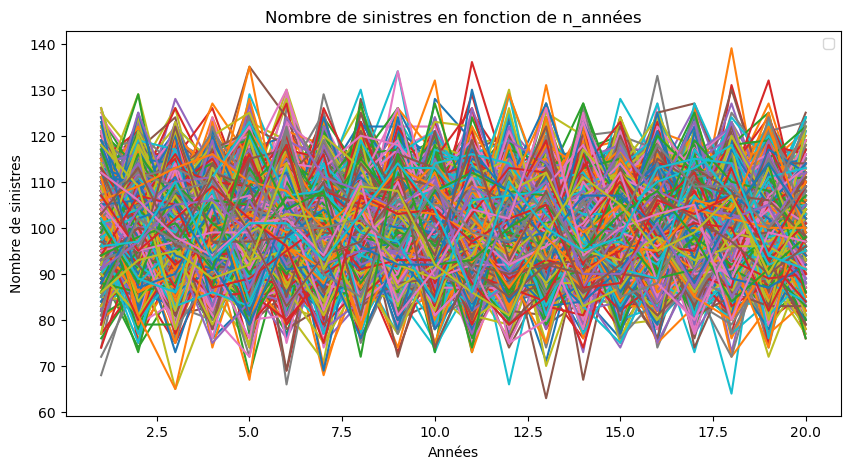

In [38]:
# Tracer le nombre de réclamations au fil du temps pour les simulations
plt.figure(figsize=(10,5))
for i in range(M):
    plt.plot(np.arange(n_annees)+1, n_sinistres_all[:, i])
plt.xlabel("Années")
plt.ylabel("Nombre de sinistres")
plt.title("Nombre de sinistres en fonction de n_années")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


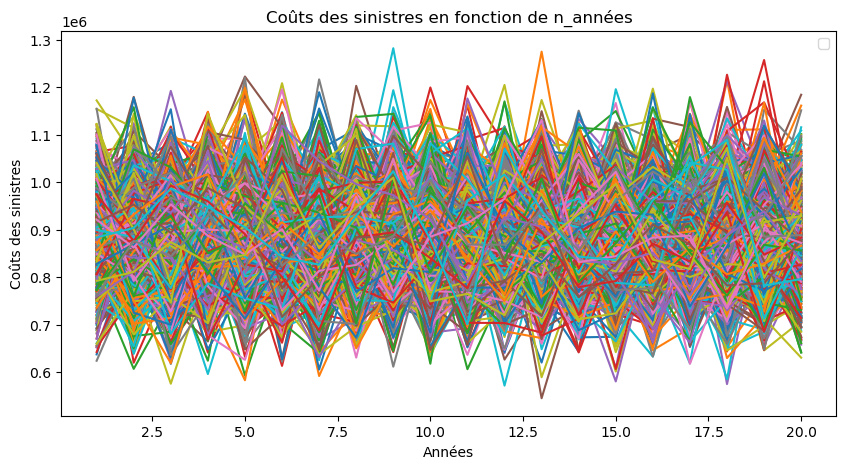

In [39]:
# Tracer le coût total des sinistres au fil du temps pour les simulations
plt.figure(figsize=(10,5))
for i in range(M):
    plt.plot(np.arange(n_annees)+1, couts_total_all[:, i])
plt.xlabel("Années")
plt.ylabel("Coûts des sinistres")
plt.title("Coûts des sinistres en fonction de n_années")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


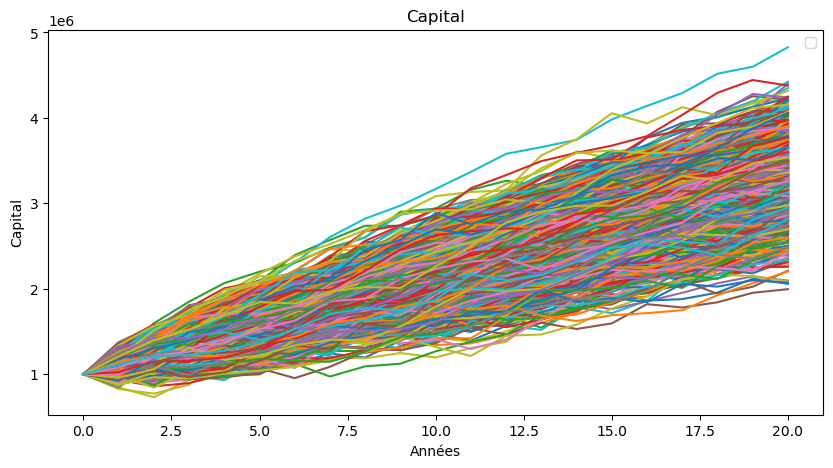

In [40]:
# Tracer le capital au fil du temps pour les simulations
plt.figure(figsize=(10,5))
for i in range(M):
    plt.plot(np.arange(n_annees+1), capital_all[:, i])
plt.xlabel("Années")
plt.ylabel("Capital")
plt.title("Capital")
plt.legend()